In [1]:
%matplotlib inline
# the above line is literally called magic. it basically is
# it helps with plotting in the notebooks

# we're going to need all of these so lets import now
# best practice of course is to do this in the first cell
import numpy as np  # common convention, lets stick to it
import scipy.optimize as opt  # we'll need this for fitting!
from matplotlib import pyplot as plt # also the common convention

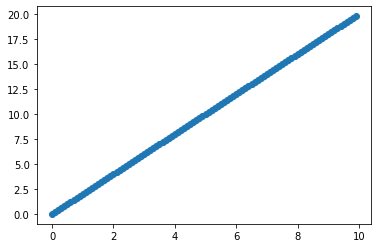

In [2]:
# start with linear data
# lets make a function that makes a line!

def line(x, m, b):
    # the order of these arguments is important later
    # and good practice
    # the x input is first because we will pass many x points

    return m * x + b  # as expected


x_data = np.arange(0, 10, 0.1)  # from 0 to 10 in steps of 0.1
y_data = line(x_data, 2, 0)

plt.scatter(x_data, y_data)

100
51


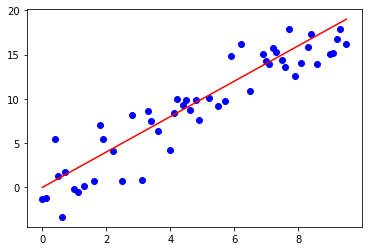

In [3]:
# boring but that's the point
# lets make something that looks like real data

x_data = np.arange(0, 10, 0.1)

# data isn't evenly spaced
# we're going to randomly choose points to keep
# we create a random array of boolean values
# then "slice" x_data; only the indices where cut is true will be kept
cut = np.random.choice(a=[False, True], size=x_data.shape)
print(len(x_data))
x_data = x_data[cut]
print(len(x_data))
y_data = line(x_data, 2, 0)

# cool but still a perfect line
# lets add noise

y_data_noisy = y_data + np.random.randn(len(y_data)) * 2

plt.scatter(x_data, y_data_noisy, c='b')
plt.plot(x_data, y_data, c='r')

1.9431661568275842 -0.3187941671052956
1.9431661568275842 -0.3187941671052956


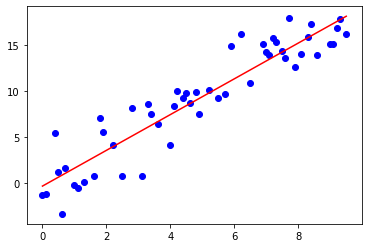

In [4]:
# now suppose we don't have y_data and know m or b, as usually happens
# that's where fitting comes in!

popt, pcov = opt.curve_fit(line, x_data, y_data_noisy)
#                           ^define your own function so you know what is going on
print(*popt)  # woah what's that *!?
# "Starred" expressions are very handy in python
# it means "unpack" basically. 
# *popt is short hand for popt[0], popt[1], ... , popt[n]
# in this case its just 0 and 1, but this saves lots of typing!
# of course this is equivalent to the long version, as can be seen
print(popt[0], popt[1])


plt.scatter(x_data, y_data_noisy, c='b')
plt.plot(x_data, line(x_data, *popt), c='r')

In [5]:
# cool that's pretty close
# now let's try it on real data!

# we're going to use numpy's built in text file reader
# names=True means use headers
# delimiter="," is the character seperating the columns
# and many thanks to https://cdiac.ess-dive.lbl.gov/ftp/ndp030/global.1751_2011.ems
# for the data
data = np.genfromtxt("co2_emmissions.dat", names=True, delimiter=",")

# this structure is a numpy array, sometimes called a "rec array" because it has named columns
# we can see a row
print("the first row of data:")
print(data[0])
# we can see the names of the columns
print("names of cols:")
print(data.dtype)
# and access data by column
print("data in the year col:")
print(data["Year"])
# and as with all arrays we can access sub-pieces
print("first 10 vals of the year col:")
print(data["Year"][:10])

OSError: co2_emmissions.dat not found.

In [ ]:
# cool lets see some trends!

plt.scatter(data["Year"], data["Total"])
plt.xlabel("Year")
plt.ylabel("CO$_2$ (Mega-tons)")

In [ ]:
# Ignoring how terrifying that is...
# your assignment is to fit a trend to that data
# you may want to try multiple functions, e.g. exponential and polynomial

In [ ]:
def expo(x,a,b,c):
    return a*np.exp(x*b+c)


popt,pcov = opt.curve_fit(expo,year_vals,tot_vals)
print(*popt)
print(expo(data["Year"],*popt))
plt.scatter(data["Year"], data["Total"], c='b')
plt.plot(data["Year"], expo(data["Year"], *popt), c='c')
plt.xlabel("Year")
plt.ylabel("CO$_2$ (Mega-tons)")